In [9]:
import torch
import numpy as np 
import pandas as pd
import os

import utils
from utils import debug, debugs, debugt
from matplotlib import pyplot as plt
from generators import Torch3DDataset
import generators
from torch.utils.data import DataLoader
import sqlite3
from hungarianmatcher import HungarianMatcher
from setcriterion import SetCriterion
from typing import Sequence
import itertools

import fishdetr3d as detr
utils.reloader(generators)
utils.reloader(Torch3DDataset)
utils.reloader(detr)
None

In [10]:
TABLE = "bboxes_full"
DIR = "/mnt/blendervol/3d_data"
BATCHSIZE = 16
num2str = eval(open(os.path.join(DIR, "metadata.txt")).read())

TORCH_CACHE_DIR = 'torch_cache'
torch.hub.set_dir(TORCH_CACHE_DIR)

In [11]:
db_con = sqlite3.connect(f'file:{os.path.join(DIR,"bboxes.db")}?mode=ro', uri=True)
print("Getting number of images in database")
n_data = pd.read_sql_query(f'SELECT COUNT(DISTINCT(imgnr)) FROM {TABLE}', db_con).values[0][0]

TRAIN_RANGE = (0, int(9/10*n_data))
VAL_RANGE = (int(9/10*n_data), n_data)

Getting number of images in database


In [12]:
traingen = Torch3DDataset(DIR, TABLE, 1, shuffle=False, imgnrs=range(*TRAIN_RANGE))
valgen = Torch3DDataset(DIR, TABLE, 1, shuffle=False, imgnrs=range(*VAL_RANGE))
testgen = Torch3DDataset(DIR+"_test", TABLE, 1, shuffle=False)

In [13]:
debug(traingen)
debug(valgen)
debug(testgen)

(1, <module>) traingen: Torch3DDataset(data=/mnt/blendervol/3d_data, index_range=[0, 32803])
(2, <module>) valgen: Torch3DDataset(data=/mnt/blendervol/3d_data, index_range=[32804, 36448])
(3, <module>) testgen: Torch3DDataset(data=/mnt/blendervol/3d_data_test, index_range=[0, 63])


In [14]:
model = detr.FishDETR()
# model.load_state_dict(torch.load('fish_statedicts_3d/weights_2021-03-22/detr_statedicts_epoch18_train0.0505_val0.0506_2021-03-22T10:22:42.pth', map_location='cpu')['model_state_dict'])
model.load_state_dict(torch.load('last_epoch_detr_3d_overfit.pth'))

Encoder successfully loaded with pretrained weights


RuntimeError: Error(s) in loading state_dict for FishDETR:
	Missing key(s) in state_dict: "encoder.query_pos", "encoder.row_embed", "encoder.col_embed", "encoder.backbone.conv1.weight", "encoder.backbone.bn1.weight", "encoder.backbone.bn1.bias", "encoder.backbone.bn1.running_mean", "encoder.backbone.bn1.running_var", "encoder.backbone.layer1.0.conv1.weight", "encoder.backbone.layer1.0.bn1.weight", "encoder.backbone.layer1.0.bn1.bias", "encoder.backbone.layer1.0.bn1.running_mean", "encoder.backbone.layer1.0.bn1.running_var", "encoder.backbone.layer1.0.conv2.weight", "encoder.backbone.layer1.0.bn2.weight", "encoder.backbone.layer1.0.bn2.bias", "encoder.backbone.layer1.0.bn2.running_mean", "encoder.backbone.layer1.0.bn2.running_var", "encoder.backbone.layer1.0.conv3.weight", "encoder.backbone.layer1.0.bn3.weight", "encoder.backbone.layer1.0.bn3.bias", "encoder.backbone.layer1.0.bn3.running_mean", "encoder.backbone.layer1.0.bn3.running_var", "encoder.backbone.layer1.0.downsample.0.weight", "encoder.backbone.layer1.0.downsample.1.weight", "encoder.backbone.layer1.0.downsample.1.bias", "encoder.backbone.layer1.0.downsample.1.running_mean", "encoder.backbone.layer1.0.downsample.1.running_var", "encoder.backbone.layer1.1.conv1.weight", "encoder.backbone.layer1.1.bn1.weight", "encoder.backbone.layer1.1.bn1.bias", "encoder.backbone.layer1.1.bn1.running_mean", "encoder.backbone.layer1.1.bn1.running_var", "encoder.backbone.layer1.1.conv2.weight", "encoder.backbone.layer1.1.bn2.weight", "encoder.backbone.layer1.1.bn2.bias", "encoder.backbone.layer1.1.bn2.running_mean", "encoder.backbone.layer1.1.bn2.running_var", "encoder.backbone.layer1.1.conv3.weight", "encoder.backbone.layer1.1.bn3.weight", "encoder.backbone.layer1.1.bn3.bias", "encoder.backbone.layer1.1.bn3.running_mean", "encoder.backbone.layer1.1.bn3.running_var", "encoder.backbone.layer1.2.conv1.weight", "encoder.backbone.layer1.2.bn1.weight", "encoder.backbone.layer1.2.bn1.bias", "encoder.backbone.layer1.2.bn1.running_mean", "encoder.backbone.layer1.2.bn1.running_var", "encoder.backbone.layer1.2.conv2.weight", "encoder.backbone.layer1.2.bn2.weight", "encoder.backbone.layer1.2.bn2.bias", "encoder.backbone.layer1.2.bn2.running_mean", "encoder.backbone.layer1.2.bn2.running_var", "encoder.backbone.layer1.2.conv3.weight", "encoder.backbone.layer1.2.bn3.weight", "encoder.backbone.layer1.2.bn3.bias", "encoder.backbone.layer1.2.bn3.running_mean", "encoder.backbone.layer1.2.bn3.running_var", "encoder.backbone.layer2.0.conv1.weight", "encoder.backbone.layer2.0.bn1.weight", "encoder.backbone.layer2.0.bn1.bias", "encoder.backbone.layer2.0.bn1.running_mean", "encoder.backbone.layer2.0.bn1.running_var", "encoder.backbone.layer2.0.conv2.weight", "encoder.backbone.layer2.0.bn2.weight", "encoder.backbone.layer2.0.bn2.bias", "encoder.backbone.layer2.0.bn2.running_mean", "encoder.backbone.layer2.0.bn2.running_var", "encoder.backbone.layer2.0.conv3.weight", "encoder.backbone.layer2.0.bn3.weight", "encoder.backbone.layer2.0.bn3.bias", "encoder.backbone.layer2.0.bn3.running_mean", "encoder.backbone.layer2.0.bn3.running_var", "encoder.backbone.layer2.0.downsample.0.weight", "encoder.backbone.layer2.0.downsample.1.weight", "encoder.backbone.layer2.0.downsample.1.bias", "encoder.backbone.layer2.0.downsample.1.running_mean", "encoder.backbone.layer2.0.downsample.1.running_var", "encoder.backbone.layer2.1.conv1.weight", "encoder.backbone.layer2.1.bn1.weight", "encoder.backbone.layer2.1.bn1.bias", "encoder.backbone.layer2.1.bn1.running_mean", "encoder.backbone.layer2.1.bn1.running_var", "encoder.backbone.layer2.1.conv2.weight", "encoder.backbone.layer2.1.bn2.weight", "encoder.backbone.layer2.1.bn2.bias", "encoder.backbone.layer2.1.bn2.running_mean", "encoder.backbone.layer2.1.bn2.running_var", "encoder.backbone.layer2.1.conv3.weight", "encoder.backbone.layer2.1.bn3.weight", "encoder.backbone.layer2.1.bn3.bias", "encoder.backbone.layer2.1.bn3.running_mean", "encoder.backbone.layer2.1.bn3.running_var", "encoder.backbone.layer2.2.conv1.weight", "encoder.backbone.layer2.2.bn1.weight", "encoder.backbone.layer2.2.bn1.bias", "encoder.backbone.layer2.2.bn1.running_mean", "encoder.backbone.layer2.2.bn1.running_var", "encoder.backbone.layer2.2.conv2.weight", "encoder.backbone.layer2.2.bn2.weight", "encoder.backbone.layer2.2.bn2.bias", "encoder.backbone.layer2.2.bn2.running_mean", "encoder.backbone.layer2.2.bn2.running_var", "encoder.backbone.layer2.2.conv3.weight", "encoder.backbone.layer2.2.bn3.weight", "encoder.backbone.layer2.2.bn3.bias", "encoder.backbone.layer2.2.bn3.running_mean", "encoder.backbone.layer2.2.bn3.running_var", "encoder.backbone.layer2.3.conv1.weight", "encoder.backbone.layer2.3.bn1.weight", "encoder.backbone.layer2.3.bn1.bias", "encoder.backbone.layer2.3.bn1.running_mean", "encoder.backbone.layer2.3.bn1.running_var", "encoder.backbone.layer2.3.conv2.weight", "encoder.backbone.layer2.3.bn2.weight", "encoder.backbone.layer2.3.bn2.bias", "encoder.backbone.layer2.3.bn2.running_mean", "encoder.backbone.layer2.3.bn2.running_var", "encoder.backbone.layer2.3.conv3.weight", "encoder.backbone.layer2.3.bn3.weight", "encoder.backbone.layer2.3.bn3.bias", "encoder.backbone.layer2.3.bn3.running_mean", "encoder.backbone.layer2.3.bn3.running_var", "encoder.backbone.layer3.0.conv1.weight", "encoder.backbone.layer3.0.bn1.weight", "encoder.backbone.layer3.0.bn1.bias", "encoder.backbone.layer3.0.bn1.running_mean", "encoder.backbone.layer3.0.bn1.running_var", "encoder.backbone.layer3.0.conv2.weight", "encoder.backbone.layer3.0.bn2.weight", "encoder.backbone.layer3.0.bn2.bias", "encoder.backbone.layer3.0.bn2.running_mean", "encoder.backbone.layer3.0.bn2.running_var", "encoder.backbone.layer3.0.conv3.weight", "encoder.backbone.layer3.0.bn3.weight", "encoder.backbone.layer3.0.bn3.bias", "encoder.backbone.layer3.0.bn3.running_mean", "encoder.backbone.layer3.0.bn3.running_var", "encoder.backbone.layer3.0.downsample.0.weight", "encoder.backbone.layer3.0.downsample.1.weight", "encoder.backbone.layer3.0.downsample.1.bias", "encoder.backbone.layer3.0.downsample.1.running_mean", "encoder.backbone.layer3.0.downsample.1.running_var", "encoder.backbone.layer3.1.conv1.weight", "encoder.backbone.layer3.1.bn1.weight", "encoder.backbone.layer3.1.bn1.bias", "encoder.backbone.layer3.1.bn1.running_mean", "encoder.backbone.layer3.1.bn1.running_var", "encoder.backbone.layer3.1.conv2.weight", "encoder.backbone.layer3.1.bn2.weight", "encoder.backbone.layer3.1.bn2.bias", "encoder.backbone.layer3.1.bn2.running_mean", "encoder.backbone.layer3.1.bn2.running_var", "encoder.backbone.layer3.1.conv3.weight", "encoder.backbone.layer3.1.bn3.weight", "encoder.backbone.layer3.1.bn3.bias", "encoder.backbone.layer3.1.bn3.running_mean", "encoder.backbone.layer3.1.bn3.running_var", "encoder.backbone.layer3.2.conv1.weight", "encoder.backbone.layer3.2.bn1.weight", "encoder.backbone.layer3.2.bn1.bias", "encoder.backbone.layer3.2.bn1.running_mean", "encoder.backbone.layer3.2.bn1.running_var", "encoder.backbone.layer3.2.conv2.weight", "encoder.backbone.layer3.2.bn2.weight", "encoder.backbone.layer3.2.bn2.bias", "encoder.backbone.layer3.2.bn2.running_mean", "encoder.backbone.layer3.2.bn2.running_var", "encoder.backbone.layer3.2.conv3.weight", "encoder.backbone.layer3.2.bn3.weight", "encoder.backbone.layer3.2.bn3.bias", "encoder.backbone.layer3.2.bn3.running_mean", "encoder.backbone.layer3.2.bn3.running_var", "encoder.backbone.layer3.3.conv1.weight", "encoder.backbone.layer3.3.bn1.weight", "encoder.backbone.layer3.3.bn1.bias", "encoder.backbone.layer3.3.bn1.running_mean", "encoder.backbone.layer3.3.bn1.running_var", "encoder.backbone.layer3.3.conv2.weight", "encoder.backbone.layer3.3.bn2.weight", "encoder.backbone.layer3.3.bn2.bias", "encoder.backbone.layer3.3.bn2.running_mean", "encoder.backbone.layer3.3.bn2.running_var", "encoder.backbone.layer3.3.conv3.weight", "encoder.backbone.layer3.3.bn3.weight", "encoder.backbone.layer3.3.bn3.bias", "encoder.backbone.layer3.3.bn3.running_mean", "encoder.backbone.layer3.3.bn3.running_var", "encoder.backbone.layer3.4.conv1.weight", "encoder.backbone.layer3.4.bn1.weight", "encoder.backbone.layer3.4.bn1.bias", "encoder.backbone.layer3.4.bn1.running_mean", "encoder.backbone.layer3.4.bn1.running_var", "encoder.backbone.layer3.4.conv2.weight", "encoder.backbone.layer3.4.bn2.weight", "encoder.backbone.layer3.4.bn2.bias", "encoder.backbone.layer3.4.bn2.running_mean", "encoder.backbone.layer3.4.bn2.running_var", "encoder.backbone.layer3.4.conv3.weight", "encoder.backbone.layer3.4.bn3.weight", "encoder.backbone.layer3.4.bn3.bias", "encoder.backbone.layer3.4.bn3.running_mean", "encoder.backbone.layer3.4.bn3.running_var", "encoder.backbone.layer3.5.conv1.weight", "encoder.backbone.layer3.5.bn1.weight", "encoder.backbone.layer3.5.bn1.bias", "encoder.backbone.layer3.5.bn1.running_mean", "encoder.backbone.layer3.5.bn1.running_var", "encoder.backbone.layer3.5.conv2.weight", "encoder.backbone.layer3.5.bn2.weight", "encoder.backbone.layer3.5.bn2.bias", "encoder.backbone.layer3.5.bn2.running_mean", "encoder.backbone.layer3.5.bn2.running_var", "encoder.backbone.layer3.5.conv3.weight", "encoder.backbone.layer3.5.bn3.weight", "encoder.backbone.layer3.5.bn3.bias", "encoder.backbone.layer3.5.bn3.running_mean", "encoder.backbone.layer3.5.bn3.running_var", "encoder.backbone.layer4.0.conv1.weight", "encoder.backbone.layer4.0.bn1.weight", "encoder.backbone.layer4.0.bn1.bias", "encoder.backbone.layer4.0.bn1.running_mean", "encoder.backbone.layer4.0.bn1.running_var", "encoder.backbone.layer4.0.conv2.weight", "encoder.backbone.layer4.0.bn2.weight", "encoder.backbone.layer4.0.bn2.bias", "encoder.backbone.layer4.0.bn2.running_mean", "encoder.backbone.layer4.0.bn2.running_var", "encoder.backbone.layer4.0.conv3.weight", "encoder.backbone.layer4.0.bn3.weight", "encoder.backbone.layer4.0.bn3.bias", "encoder.backbone.layer4.0.bn3.running_mean", "encoder.backbone.layer4.0.bn3.running_var", "encoder.backbone.layer4.0.downsample.0.weight", "encoder.backbone.layer4.0.downsample.1.weight", "encoder.backbone.layer4.0.downsample.1.bias", "encoder.backbone.layer4.0.downsample.1.running_mean", "encoder.backbone.layer4.0.downsample.1.running_var", "encoder.backbone.layer4.1.conv1.weight", "encoder.backbone.layer4.1.bn1.weight", "encoder.backbone.layer4.1.bn1.bias", "encoder.backbone.layer4.1.bn1.running_mean", "encoder.backbone.layer4.1.bn1.running_var", "encoder.backbone.layer4.1.conv2.weight", "encoder.backbone.layer4.1.bn2.weight", "encoder.backbone.layer4.1.bn2.bias", "encoder.backbone.layer4.1.bn2.running_mean", "encoder.backbone.layer4.1.bn2.running_var", "encoder.backbone.layer4.1.conv3.weight", "encoder.backbone.layer4.1.bn3.weight", "encoder.backbone.layer4.1.bn3.bias", "encoder.backbone.layer4.1.bn3.running_mean", "encoder.backbone.layer4.1.bn3.running_var", "encoder.backbone.layer4.2.conv1.weight", "encoder.backbone.layer4.2.bn1.weight", "encoder.backbone.layer4.2.bn1.bias", "encoder.backbone.layer4.2.bn1.running_mean", "encoder.backbone.layer4.2.bn1.running_var", "encoder.backbone.layer4.2.conv2.weight", "encoder.backbone.layer4.2.bn2.weight", "encoder.backbone.layer4.2.bn2.bias", "encoder.backbone.layer4.2.bn2.running_mean", "encoder.backbone.layer4.2.bn2.running_var", "encoder.backbone.layer4.2.conv3.weight", "encoder.backbone.layer4.2.bn3.weight", "encoder.backbone.layer4.2.bn3.bias", "encoder.backbone.layer4.2.bn3.running_mean", "encoder.backbone.layer4.2.bn3.running_var", "encoder.conv.weight", "encoder.conv.bias", "encoder.transformer.encoder.layers.0.self_attn.in_proj_weight", "encoder.transformer.encoder.layers.0.self_attn.in_proj_bias", "encoder.transformer.encoder.layers.0.self_attn.out_proj.weight", "encoder.transformer.encoder.layers.0.self_attn.out_proj.bias", "encoder.transformer.encoder.layers.0.linear1.weight", "encoder.transformer.encoder.layers.0.linear1.bias", "encoder.transformer.encoder.layers.0.linear2.weight", "encoder.transformer.encoder.layers.0.linear2.bias", "encoder.transformer.encoder.layers.0.norm1.weight", "encoder.transformer.encoder.layers.0.norm1.bias", "encoder.transformer.encoder.layers.0.norm2.weight", "encoder.transformer.encoder.layers.0.norm2.bias", "encoder.transformer.encoder.layers.1.self_attn.in_proj_weight", "encoder.transformer.encoder.layers.1.self_attn.in_proj_bias", "encoder.transformer.encoder.layers.1.self_attn.out_proj.weight", "encoder.transformer.encoder.layers.1.self_attn.out_proj.bias", "encoder.transformer.encoder.layers.1.linear1.weight", "encoder.transformer.encoder.layers.1.linear1.bias", "encoder.transformer.encoder.layers.1.linear2.weight", "encoder.transformer.encoder.layers.1.linear2.bias", "encoder.transformer.encoder.layers.1.norm1.weight", "encoder.transformer.encoder.layers.1.norm1.bias", "encoder.transformer.encoder.layers.1.norm2.weight", "encoder.transformer.encoder.layers.1.norm2.bias", "encoder.transformer.encoder.layers.2.self_attn.in_proj_weight", "encoder.transformer.encoder.layers.2.self_attn.in_proj_bias", "encoder.transformer.encoder.layers.2.self_attn.out_proj.weight", "encoder.transformer.encoder.layers.2.self_attn.out_proj.bias", "encoder.transformer.encoder.layers.2.linear1.weight", "encoder.transformer.encoder.layers.2.linear1.bias", "encoder.transformer.encoder.layers.2.linear2.weight", "encoder.transformer.encoder.layers.2.linear2.bias", "encoder.transformer.encoder.layers.2.norm1.weight", "encoder.transformer.encoder.layers.2.norm1.bias", "encoder.transformer.encoder.layers.2.norm2.weight", "encoder.transformer.encoder.layers.2.norm2.bias", "encoder.transformer.encoder.layers.3.self_attn.in_proj_weight", "encoder.transformer.encoder.layers.3.self_attn.in_proj_bias", "encoder.transformer.encoder.layers.3.self_attn.out_proj.weight", "encoder.transformer.encoder.layers.3.self_attn.out_proj.bias", "encoder.transformer.encoder.layers.3.linear1.weight", "encoder.transformer.encoder.layers.3.linear1.bias", "encoder.transformer.encoder.layers.3.linear2.weight", "encoder.transformer.encoder.layers.3.linear2.bias", "encoder.transformer.encoder.layers.3.norm1.weight", "encoder.transformer.encoder.layers.3.norm1.bias", "encoder.transformer.encoder.layers.3.norm2.weight", "encoder.transformer.encoder.layers.3.norm2.bias", "encoder.transformer.encoder.layers.4.self_attn.in_proj_weight", "encoder.transformer.encoder.layers.4.self_attn.in_proj_bias", "encoder.transformer.encoder.layers.4.self_attn.out_proj.weight", "encoder.transformer.encoder.layers.4.self_attn.out_proj.bias", "encoder.transformer.encoder.layers.4.linear1.weight", "encoder.transformer.encoder.layers.4.linear1.bias", "encoder.transformer.encoder.layers.4.linear2.weight", "encoder.transformer.encoder.layers.4.linear2.bias", "encoder.transformer.encoder.layers.4.norm1.weight", "encoder.transformer.encoder.layers.4.norm1.bias", "encoder.transformer.encoder.layers.4.norm2.weight", "encoder.transformer.encoder.layers.4.norm2.bias", "encoder.transformer.encoder.layers.5.self_attn.in_proj_weight", "encoder.transformer.encoder.layers.5.self_attn.in_proj_bias", "encoder.transformer.encoder.layers.5.self_attn.out_proj.weight", "encoder.transformer.encoder.layers.5.self_attn.out_proj.bias", "encoder.transformer.encoder.layers.5.linear1.weight", "encoder.transformer.encoder.layers.5.linear1.bias", "encoder.transformer.encoder.layers.5.linear2.weight", "encoder.transformer.encoder.layers.5.linear2.bias", "encoder.transformer.encoder.layers.5.norm1.weight", "encoder.transformer.encoder.layers.5.norm1.bias", "encoder.transformer.encoder.layers.5.norm2.weight", "encoder.transformer.encoder.layers.5.norm2.bias", "encoder.transformer.encoder.norm.weight", "encoder.transformer.encoder.norm.bias", "encoder.transformer.decoder.layers.0.self_attn.in_proj_weight", "encoder.transformer.decoder.layers.0.self_attn.in_proj_bias", "encoder.transformer.decoder.layers.0.self_attn.out_proj.weight", "encoder.transformer.decoder.layers.0.self_attn.out_proj.bias", "encoder.transformer.decoder.layers.0.multihead_attn.in_proj_weight", "encoder.transformer.decoder.layers.0.multihead_attn.in_proj_bias", "encoder.transformer.decoder.layers.0.multihead_attn.out_proj.weight", "encoder.transformer.decoder.layers.0.multihead_attn.out_proj.bias", "encoder.transformer.decoder.layers.0.linear1.weight", "encoder.transformer.decoder.layers.0.linear1.bias", "encoder.transformer.decoder.layers.0.linear2.weight", "encoder.transformer.decoder.layers.0.linear2.bias", "encoder.transformer.decoder.layers.0.norm1.weight", "encoder.transformer.decoder.layers.0.norm1.bias", "encoder.transformer.decoder.layers.0.norm2.weight", "encoder.transformer.decoder.layers.0.norm2.bias", "encoder.transformer.decoder.layers.0.norm3.weight", "encoder.transformer.decoder.layers.0.norm3.bias", "encoder.transformer.decoder.layers.1.self_attn.in_proj_weight", "encoder.transformer.decoder.layers.1.self_attn.in_proj_bias", "encoder.transformer.decoder.layers.1.self_attn.out_proj.weight", "encoder.transformer.decoder.layers.1.self_attn.out_proj.bias", "encoder.transformer.decoder.layers.1.multihead_attn.in_proj_weight", "encoder.transformer.decoder.layers.1.multihead_attn.in_proj_bias", "encoder.transformer.decoder.layers.1.multihead_attn.out_proj.weight", "encoder.transformer.decoder.layers.1.multihead_attn.out_proj.bias", "encoder.transformer.decoder.layers.1.linear1.weight", "encoder.transformer.decoder.layers.1.linear1.bias", "encoder.transformer.decoder.layers.1.linear2.weight", "encoder.transformer.decoder.layers.1.linear2.bias", "encoder.transformer.decoder.layers.1.norm1.weight", "encoder.transformer.decoder.layers.1.norm1.bias", "encoder.transformer.decoder.layers.1.norm2.weight", "encoder.transformer.decoder.layers.1.norm2.bias", "encoder.transformer.decoder.layers.1.norm3.weight", "encoder.transformer.decoder.layers.1.norm3.bias", "encoder.transformer.decoder.layers.2.self_attn.in_proj_weight", "encoder.transformer.decoder.layers.2.self_attn.in_proj_bias", "encoder.transformer.decoder.layers.2.self_attn.out_proj.weight", "encoder.transformer.decoder.layers.2.self_attn.out_proj.bias", "encoder.transformer.decoder.layers.2.multihead_attn.in_proj_weight", "encoder.transformer.decoder.layers.2.multihead_attn.in_proj_bias", "encoder.transformer.decoder.layers.2.multihead_attn.out_proj.weight", "encoder.transformer.decoder.layers.2.multihead_attn.out_proj.bias", "encoder.transformer.decoder.layers.2.linear1.weight", "encoder.transformer.decoder.layers.2.linear1.bias", "encoder.transformer.decoder.layers.2.linear2.weight", "encoder.transformer.decoder.layers.2.linear2.bias", "encoder.transformer.decoder.layers.2.norm1.weight", "encoder.transformer.decoder.layers.2.norm1.bias", "encoder.transformer.decoder.layers.2.norm2.weight", "encoder.transformer.decoder.layers.2.norm2.bias", "encoder.transformer.decoder.layers.2.norm3.weight", "encoder.transformer.decoder.layers.2.norm3.bias", "encoder.transformer.decoder.layers.3.self_attn.in_proj_weight", "encoder.transformer.decoder.layers.3.self_attn.in_proj_bias", "encoder.transformer.decoder.layers.3.self_attn.out_proj.weight", "encoder.transformer.decoder.layers.3.self_attn.out_proj.bias", "encoder.transformer.decoder.layers.3.multihead_attn.in_proj_weight", "encoder.transformer.decoder.layers.3.multihead_attn.in_proj_bias", "encoder.transformer.decoder.layers.3.multihead_attn.out_proj.weight", "encoder.transformer.decoder.layers.3.multihead_attn.out_proj.bias", "encoder.transformer.decoder.layers.3.linear1.weight", "encoder.transformer.decoder.layers.3.linear1.bias", "encoder.transformer.decoder.layers.3.linear2.weight", "encoder.transformer.decoder.layers.3.linear2.bias", "encoder.transformer.decoder.layers.3.norm1.weight", "encoder.transformer.decoder.layers.3.norm1.bias", "encoder.transformer.decoder.layers.3.norm2.weight", "encoder.transformer.decoder.layers.3.norm2.bias", "encoder.transformer.decoder.layers.3.norm3.weight", "encoder.transformer.decoder.layers.3.norm3.bias", "encoder.transformer.decoder.layers.4.self_attn.in_proj_weight", "encoder.transformer.decoder.layers.4.self_attn.in_proj_bias", "encoder.transformer.decoder.layers.4.self_attn.out_proj.weight", "encoder.transformer.decoder.layers.4.self_attn.out_proj.bias", "encoder.transformer.decoder.layers.4.multihead_attn.in_proj_weight", "encoder.transformer.decoder.layers.4.multihead_attn.in_proj_bias", "encoder.transformer.decoder.layers.4.multihead_attn.out_proj.weight", "encoder.transformer.decoder.layers.4.multihead_attn.out_proj.bias", "encoder.transformer.decoder.layers.4.linear1.weight", "encoder.transformer.decoder.layers.4.linear1.bias", "encoder.transformer.decoder.layers.4.linear2.weight", "encoder.transformer.decoder.layers.4.linear2.bias", "encoder.transformer.decoder.layers.4.norm1.weight", "encoder.transformer.decoder.layers.4.norm1.bias", "encoder.transformer.decoder.layers.4.norm2.weight", "encoder.transformer.decoder.layers.4.norm2.bias", "encoder.transformer.decoder.layers.4.norm3.weight", "encoder.transformer.decoder.layers.4.norm3.bias", "encoder.transformer.decoder.layers.5.self_attn.in_proj_weight", "encoder.transformer.decoder.layers.5.self_attn.in_proj_bias", "encoder.transformer.decoder.layers.5.self_attn.out_proj.weight", "encoder.transformer.decoder.layers.5.self_attn.out_proj.bias", "encoder.transformer.decoder.layers.5.multihead_attn.in_proj_weight", "encoder.transformer.decoder.layers.5.multihead_attn.in_proj_bias", "encoder.transformer.decoder.layers.5.multihead_attn.out_proj.weight", "encoder.transformer.decoder.layers.5.multihead_attn.out_proj.bias", "encoder.transformer.decoder.layers.5.linear1.weight", "encoder.transformer.decoder.layers.5.linear1.bias", "encoder.transformer.decoder.layers.5.linear2.weight", "encoder.transformer.decoder.layers.5.linear2.bias", "encoder.transformer.decoder.layers.5.norm1.weight", "encoder.transformer.decoder.layers.5.norm1.bias", "encoder.transformer.decoder.layers.5.norm2.weight", "encoder.transformer.decoder.layers.5.norm2.bias", "encoder.transformer.decoder.layers.5.norm3.weight", "encoder.transformer.decoder.layers.5.norm3.bias", "encoder.transformer.decoder.norm.weight", "encoder.transformer.decoder.norm.bias", "decoder.block1.conv1.weight", "decoder.block1.bn1.weight", "decoder.block1.bn1.bias", "decoder.block1.bn1.running_mean", "decoder.block1.bn1.running_var", "decoder.block1.conv2.weight", "decoder.block1.bn2.weight", "decoder.block1.bn2.bias", "decoder.block1.bn2.running_mean", "decoder.block1.bn2.running_var", "decoder.block1.conv3.weight", "decoder.block1.bn3.weight", "decoder.block1.bn3.bias", "decoder.block1.bn3.running_mean", "decoder.block1.bn3.running_var", "decoder.block2.conv1.weight", "decoder.block2.bn1.weight", "decoder.block2.bn1.bias", "decoder.block2.bn1.running_mean", "decoder.block2.bn1.running_var", "decoder.block2.conv2.weight", "decoder.block2.bn2.weight", "decoder.block2.bn2.bias", "decoder.block2.bn2.running_mean", "decoder.block2.bn2.running_var", "decoder.block2.conv3.weight", "decoder.block2.bn3.weight", "decoder.block2.bn3.bias", "decoder.block2.bn3.running_mean", "decoder.block2.bn3.running_var", "decoder.block3.conv1.weight", "decoder.block3.bn1.weight", "decoder.block3.bn1.bias", "decoder.block3.bn1.running_mean", "decoder.block3.bn1.running_var", "decoder.block3.conv2.weight", "decoder.block3.bn2.weight", "decoder.block3.bn2.bias", "decoder.block3.bn2.running_mean", "decoder.block3.bn2.running_var", "decoder.block3.conv3.weight", "decoder.block3.bn3.weight", "decoder.block3.bn3.bias", "decoder.block3.bn3.running_mean", "decoder.block3.bn3.running_var", "decoder.block4.conv1.weight", "decoder.block4.bn1.weight", "decoder.block4.bn1.bias", "decoder.block4.bn1.running_mean", "decoder.block4.bn1.running_var", "decoder.block4.conv2.weight", "decoder.block4.bn2.weight", "decoder.block4.bn2.bias", "decoder.block4.bn2.running_mean", "decoder.block4.bn2.running_var", "decoder.block4.conv3.weight", "decoder.block4.bn3.weight", "decoder.block4.bn3.bias", "decoder.block4.bn3.running_mean", "decoder.block4.bn3.running_var", "decoder.linear_class.0.weight", "decoder.linear_class.0.bias", "decoder.linear_class.2.weight", "decoder.linear_class.2.bias", "decoder.linear_class.4.weight", "decoder.linear_class.4.bias", "decoder.linear_class.6.weight", "decoder.linear_class.6.bias", "decoder.linear_class.8.weight", "decoder.linear_class.8.bias", "decoder.linear_boxes.0.weight", "decoder.linear_boxes.0.bias", "decoder.linear_boxes.2.weight", "decoder.linear_boxes.2.bias", "decoder.linear_boxes.4.weight", "decoder.linear_boxes.4.bias", "decoder.linear_boxes.6.weight", "decoder.linear_boxes.6.bias", "decoder.linear_boxes.8.weight", "decoder.linear_boxes.8.bias". 
	Unexpected key(s) in state_dict: "model_state_dict", "optimizer", "criterion". 

In [ ]:
BATCH_SIZE = 6
testloader = DataLoader(
    dataset = traingen,
    batch_size = BATCH_SIZE,
    collate_fn = detr.collate,
#     pin_memory = True,
    shuffle = False
)

weight_dict = {'loss_ce': 1, 'loss_bbox': 1 , 'loss_giou': 1, 'loss_smooth':1}
losses = ['labels', 'boxes_smooth_l1']
matcher = HungarianMatcher(use_giou=False, smooth_l1=False)
criterion = SetCriterion(6, matcher, weight_dict, eos_coef = 0.5, losses=losses)

In [ ]:
X, y = next(iter(testloader))

In [15]:
X_, y_ = detr.preprocess(X, y, None)
with torch.no_grad():
    out, loss = model.eval_on_batch(X_, y_, criterion)

AttributeError: 'str' object has no attribute 'items'

In [16]:
df = detr.postprocess_to_df(range(0,6), out, 0.7)
df.to_csv('nogit_test_output.csv')

NameError: name 'out' is not defined

In [17]:
pd.read_sql("SELECT * FROM bboxes_full",traingen.con).to_csv("nogit_test_labels.csv", index=False)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

ValueError: too many values to unpack (expected 4)

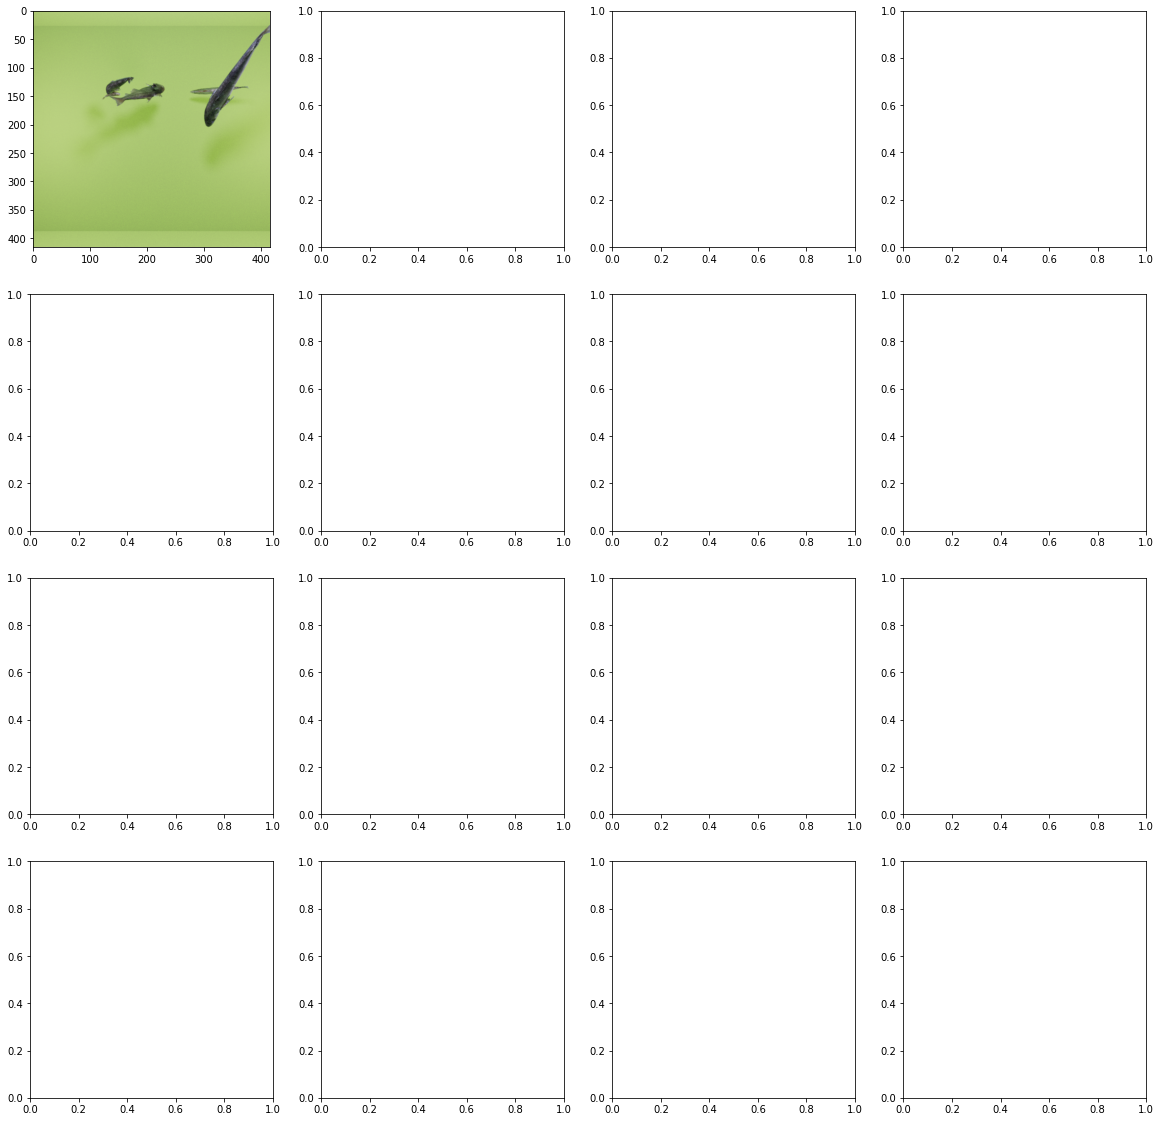

In [18]:
gen = Torch3DDataset(data_dir=DIR, table=TABLE, batch_size=BATCHSIZE, n_classes=6, shuffle=False)

grid = (4,4)
fig, axes = plt.subplots(*grid, figsize=(grid[1]*5,grid[0]*5))

for i, ax in enumerate(np.ravel(axes)):
    X, y = testgen[i]
    left_img = X[0]
    boxes = y['boxes']
    boxes[:,[0,1]] += boxes[:,[2,3]]*0.5 
    utils.plot_bboxes(left_img[0].permute((1,2,0)), classes=y['labels'], boxes=boxes, classmap=num2str, ax=ax)
    